In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [40]:
def plot_prediction_vs_truth(y_test, y_pred, model="", title="Prediction vs Truth"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predictions")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{model} {title}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")


def plot_residuals(y_test, y_pred, model="", title="Residual Plot"):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
    plt.axhline(0, color='red', linestyle='--', label="Zero Error")
    plt.title(f"{model}: {title}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Truth - Prediction)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_predictions_and_truth(y_test, y_pred, x_values=None, model="", title="Prediction vs Truth"):
    plt.figure(figsize=(10, 6))

    # If no x_values are provided, use the index
    if x_values is None:
        x_values = range(len(y_test))

    # Plot true values
    plt.plot(x_values, y_test, label="True Values", color='blue', marker='o', linestyle='-', alpha=0.7)

    # Plot predicted values
    plt.plot(x_values, y_pred, label="Predicted Values", color='orange', marker='x', linestyle='--', alpha=0.7)

    plt.title(f"{model} {title}")
    plt.xlabel("Index or Feature")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()



# Loading data

In [11]:
df = pd.read_csv("sbern_clean_data.csv")
df

,title_embedding_0,title_embedding_1,title_embedding_2,title_embedding_3,title_embedding_4,title_embedding_5,title_embedding_6,title_embedding_7,title_embedding_8,title_embedding_9,...,description_embedding_376,description_embedding_377,description_embedding_378,description_embedding_379,description_embedding_380,description_embedding_381,description_embedding_382,description_embedding_383,max_salary,min_salary
0,-0.063603,-0.019877,-0.020473,0.042247,0.020985,0.044456,0.059569,-0.029050,-0.028041,-0.063394,...,0.040883,0.018006,0.044540,0.086504,-0.029958,-0.063886,-0.099586,-0.035233,140000.0,120000.0
1,-0.111171,-0.006716,0.009094,0.032597,-0.077111,-0.010259,0.115095,-0.002294,-0.031405,0.028836,...,0.000121,0.033597,-0.010721,0.058700,0.044552,-0.044656,-0.091940,-0.010058,90000.0,75000.0
2,-0.059143,0.040145,-0.019067,0.065502,-0.021815,-0.025730,0.098980,-0.061044,-0.042737,0.050334,...,0.043789,-0.001736,-0.063861,0.007046,0.092893,-0.022558,-0.002183,-0.032135,94000.0,81000.0
3,0.013077,0.078706,-0.028917,-0.046729,-0.048853,-0.003657,-0.003180,-0.012976,0.004399,-0.007965,...,-0.036198,-0.035043,0.050508,-0.017992,0.012095,-0.041543,0.029111,-0.003667,85000.0,75000.0
4,-0.135947,-0.064396,-0.026976,-0.046996,-0.089294,0.054742,0.081126,-0.012659,0.006888,-0.040144,...,0.007229,0.033109,0.044553,0.099179,0.048448,-0.013851,0.009126,-0.007144,85000.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0.038631,-0.039735,-0.169539,0.019766,-0.063245,-0.029249,0.137824,0.041568,0.021875,0.005699,...,-0.059772,0.026981,-0.031856,0.001485,0.074747,-0.115926,-0.043142,0.044469,125000.0,95000.0
1085,-0.008970,-0.005086,-0.026694,0.052374,-0.086772,-0.010033,0.021369,-0.017369,0.036629,0.024640,...,-0.029764,0.002982,0.002245,0.049771,-0.002933,-0.046166,0.001684,0.020020,154000.0,88000.0
1086,-0.086958,0.071191,-0.038423,0.037431,-0.097348,-0.042142,0.117704,0.000527,-0.054608,-0.004822,...,0.060426,-0.058258,-0.010835,0.028597,0.058725,-0.019493,0.041316,-0.008880,88745.0,77650.0
1087,-0.082414,0.005989,-0.011214,-0.023214,-0.052307,-0.056159,-0.012348,0.030381,-0.051572,0.012427,...,-0.021992,0.038223,0.003886,-0.008708,0.052646,-0.028744,-0.029115,-0.017666,188000.0,160000.0


In [12]:
X = df.drop(columns=["min_salary", "max_salary"])
y_min = df["min_salary"]
y_max = df["max_salary"]

X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    X, y_min, y_max, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_min_train shape:", y_min_train.shape)
print("y_min_test shape:", y_min_test.shape)
print("y_max_train shape:", y_max_train.shape)
print("y_max_test shape:", y_max_test.shape)

X_train shape: (871, 768)
X_test shape: (218, 768)
y_min_train shape: (871,)
y_min_test shape: (218,)
y_max_train shape: (871,)
y_max_test shape: (218,)


# Training for predicting min_salary

## Hypermarameter Tuning

### SVM

In [14]:
svr_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

In [ ]:
svr = SVR()
svr_grid = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)
svr_grid.fit(X_train, y_min_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.2s
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, epsilon=0.2, kernel=linear; total time=   0.2s
[CV] END ........C=0.1, degree=3, epsilon=0.1, 

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Best SVR model
best_svr_min_salary = svr_grid.best_estimator_
best_svr_min_salary.get_params()

### Gradient Boosting

In [17]:
gbr_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_random = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
gbr_random.fit(X_train, y_min_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   5.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  13.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  13.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  13.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.8s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=  19.7s
[CV] END

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
# Best GBR model
best_gbr_min_salary = gbr_random.best_estimator_
best_gbr_min_salary.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.6,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Training for predicting max_salary

## Hypermarameter Tuning

### SVM

In [23]:
svr_param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

In [ ]:
svr = SVR()
svr_grid = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)
svr_grid.fit(X_train, y_max_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.1, degree=3, epsilon=0.2, kernel=rbf; total time=   0.1s
[CV] END ..........C=1, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .......C=1000, degree=2, epsilon=0.5, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, epsilon=0.2, kernel=linear; total time=   0.1s
[CV] END .........C=10, degree=2, epsilon=0.2, 

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Best SVR model
best_svr_max_salary = svr_grid.best_estimator_
best_svr_max_salary.get_params()

### Gradient Boosting

In [26]:
gbr_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0]
}

In [27]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_random = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
gbr_random.fit(X_train, y_max_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.6; total time=   5.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  12.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  12.8s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=  13.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.4s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   9.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=  18.6s
[CV] END

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# Best GBR model
best_gbr_max_salary = gbr_random.best_estimator_
best_gbr_max_salary.get_params()

# {'alpha': 0.9,
#  'ccp_alpha': 0.0,
#  'criterion': 'friedman_mse',
#  'init': None,
#  'learning_rate': 0.1,
#  'loss': 'squared_error',
#  'max_depth': 3,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 500,
#  'n_iter_no_change': None,
#  'random_state': 42,
#  'subsample': 0.6,
#  'tol': 0.0001,
#  'validation_fraction': 0.1,
#  'verbose': 0,
#  'warm_start': False}

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.6,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Evaluation for predicting min_salary

In [42]:
# SVR with optimized parameters
best_svr_min_salary.fit(X_train, y_min_train)
svr_predictions = best_svr_min_salary.predict(X_test)
svr_mse = mean_squared_error(y_min_test, svr_predictions)
print("Optimized SVR MSE:", svr_mse)

# Gradient Boosting Regressor with optimized parameters
best_gbr_min_salary.fit(X_train, y_min_train)
gbr_predictions = best_gbr_min_salary.predict(X_test)
gbr_mse = mean_squared_error(y_min_test, gbr_predictions)
print("Optimized GBR MSE:", gbr_mse)

Optimized SVR MSE: 1707034720.409122
Optimized GBR MSE: 1184363847.0286927


## SVM plots

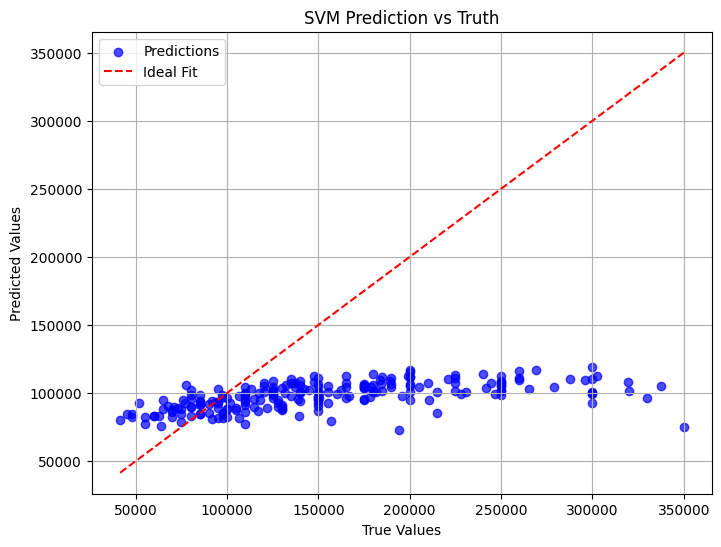

Mean Squared Error: 7173036111.49


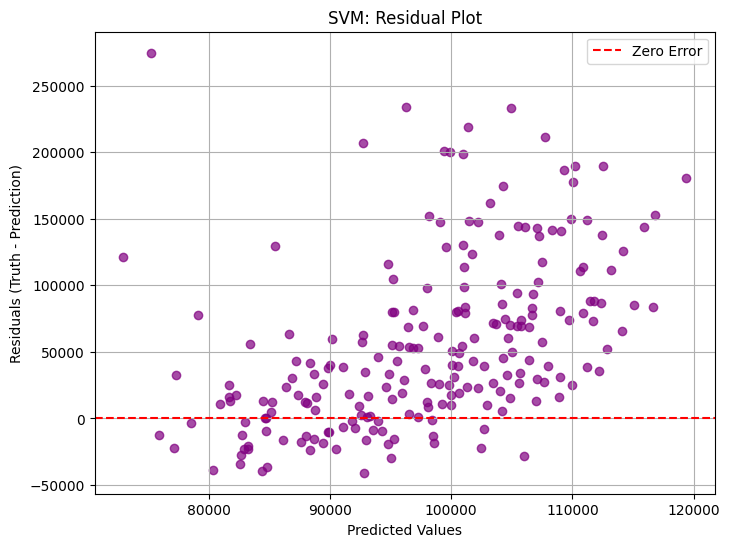

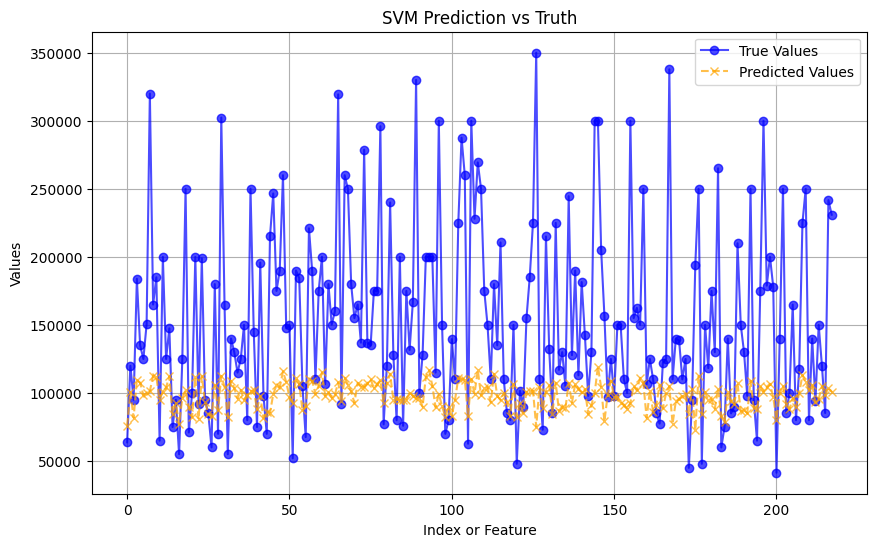

In [43]:
plot_prediction_vs_truth(y_max_test, svr_predictions, model="SVM")
plot_residuals(y_max_test, svr_predictions, model="SVM")
plot_predictions_and_truth(y_max_test, svr_predictions, model="SVM")

## Gradient Boosting plots

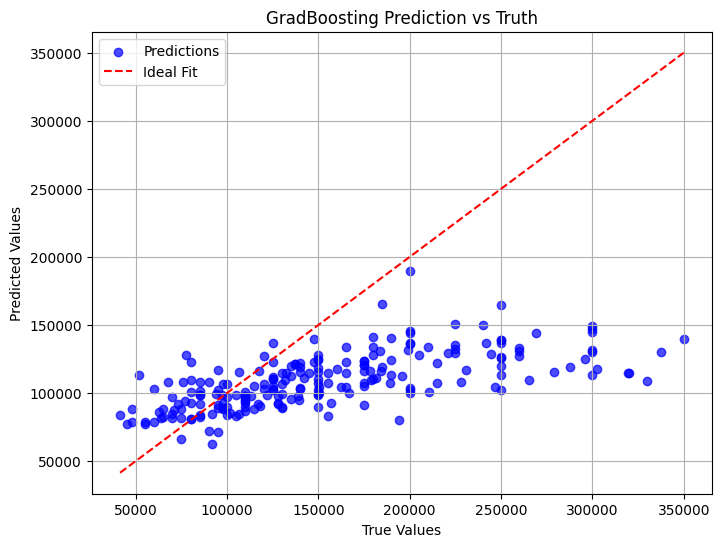

Mean Squared Error: 5319567794.39


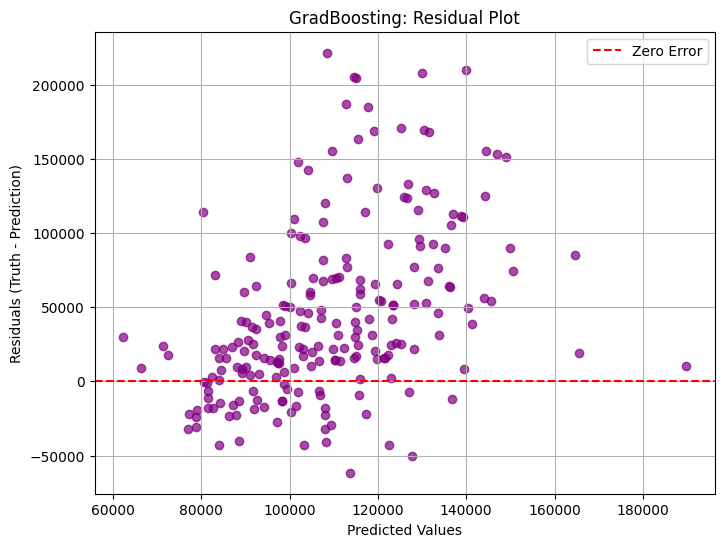

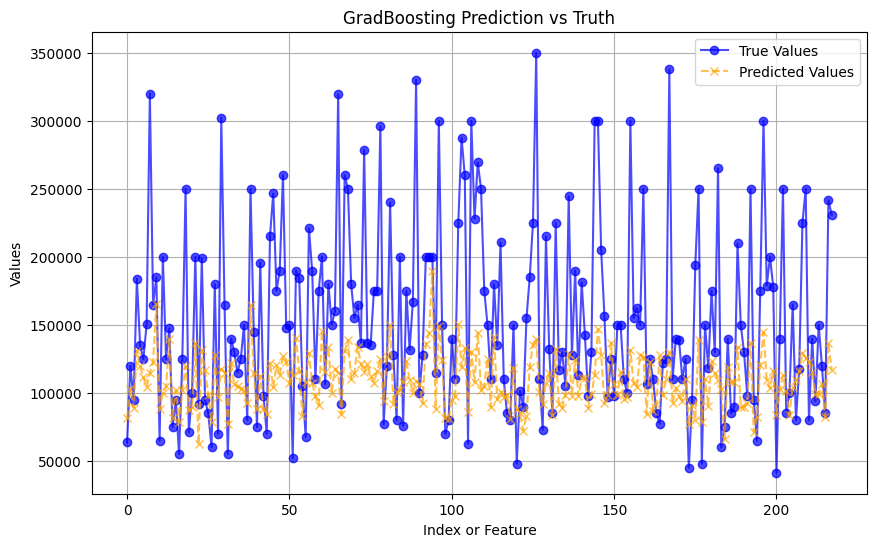

In [44]:
plot_prediction_vs_truth(y_max_test, gbr_predictions, model="GradBoosting")
plot_residuals(y_max_test, gbr_predictions, model="GradBoosting")
plot_predictions_and_truth(y_max_test, gbr_predictions, model="GradBoosting")

# Evaluation for predicting max_salary

In [45]:
# SVR with optimized parameters
best_svr_max_salary.fit(X_train, y_max_train)
svr_predictions = best_svr_max_salary.predict(X_test)
svr_mse = mean_squared_error(y_max_test, svr_predictions)
print("Optimized SVR MSE:", svr_mse)

# Gradient Boosting Regressor with optimized parameters
best_gbr_max_salary.fit(X_train, y_max_train)
gbr_predictions = best_gbr_max_salary.predict(X_test)
gbr_mse = mean_squared_error(y_max_test, gbr_predictions)
print("Optimized GBR MSE:", gbr_mse)

Optimized SVR MSE: 4150651410.775317
Optimized GBR MSE: 2612491121.224111


## SVM plots

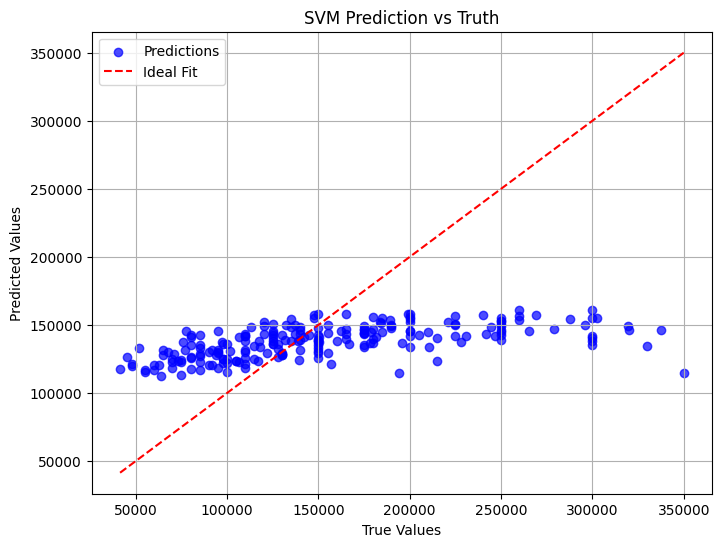

Mean Squared Error: 4150651410.78


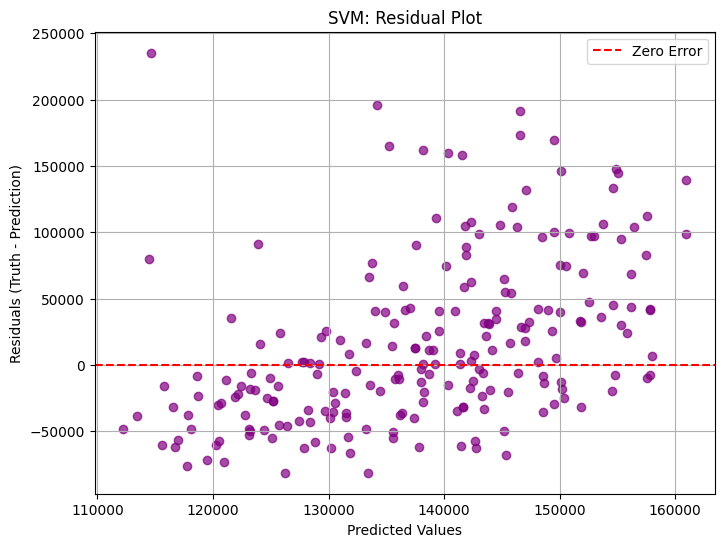

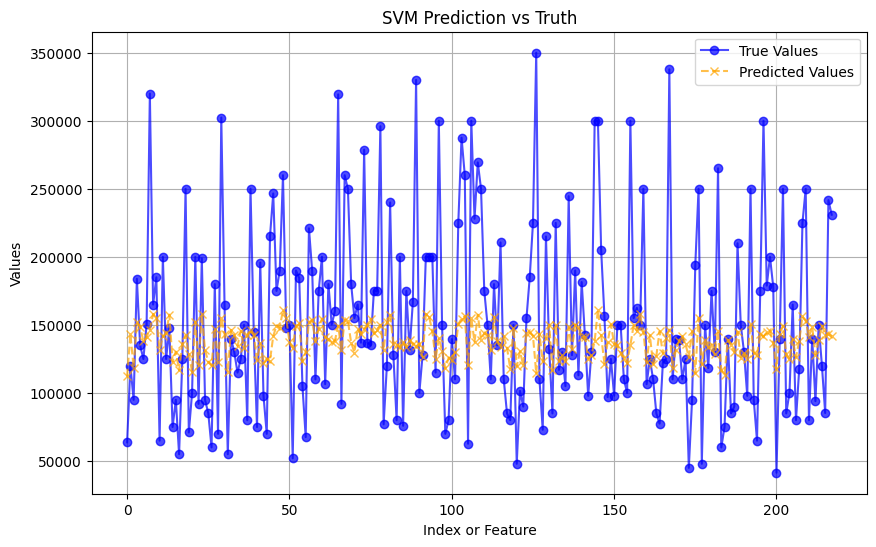

In [46]:
plot_prediction_vs_truth(y_max_test, svr_predictions, model="SVM")
plot_residuals(y_max_test, svr_predictions, model="SVM")
plot_predictions_and_truth(y_max_test, svr_predictions, model="SVM")

## Gradient Boosting plots

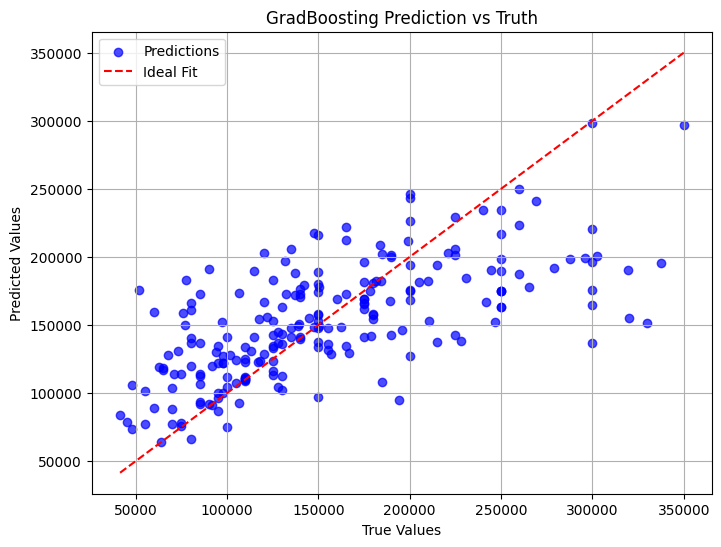

Mean Squared Error: 2612491121.22


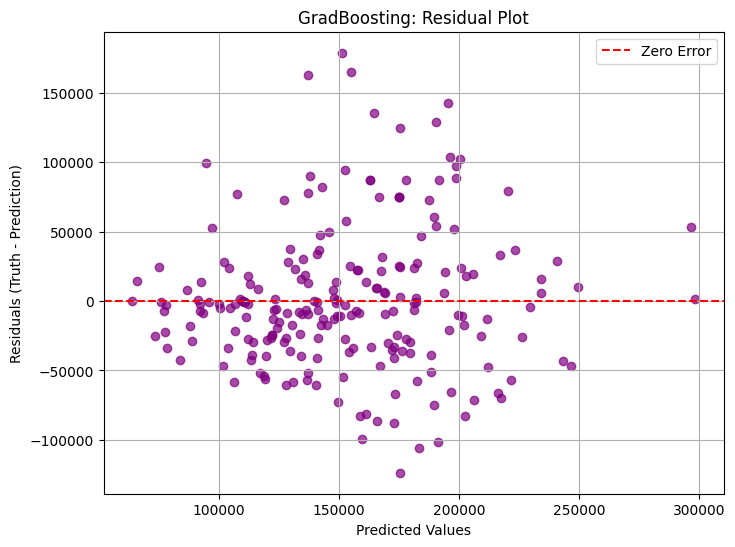

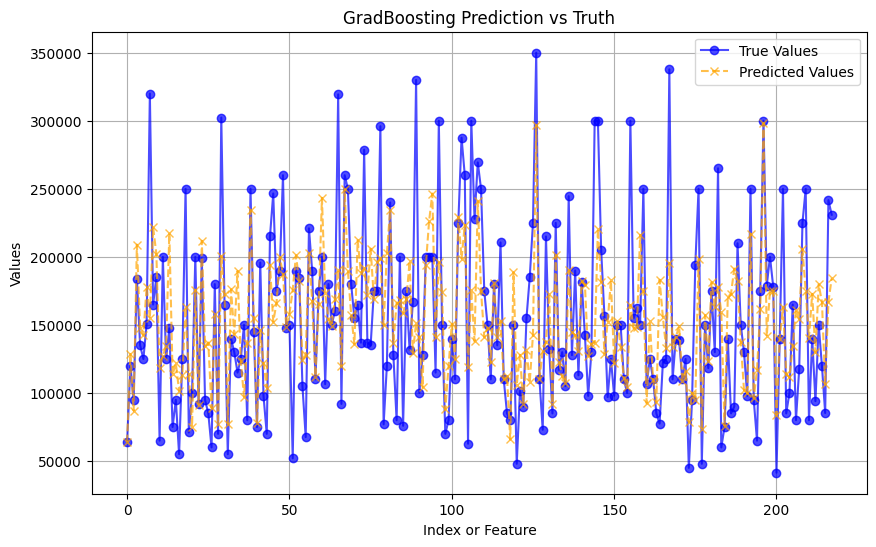

In [47]:
plot_prediction_vs_truth(y_max_test, gbr_predictions, model="GradBoosting")
plot_residuals(y_max_test, gbr_predictions, model="GradBoosting")
plot_predictions_and_truth(y_max_test, gbr_predictions, model="GradBoosting")